In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#plot the results
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load your data
data = pd.read_csv('motorwayUpdated.csv')

# Display the first few rows of the dataframe
display(data.head())


,Unnamed: 0,longitude,latitude,gravity,traffic,fastFoods,hotels,motorwayLinks,motorways,restaurants,shopSupermarkets,ratios_length,minCapacity,maxCapacity,use,owner
0,0,10.16120,57.1524,2120.270,0,0.0,0.0,1458.550,661.721,0.0,0.0,2,43.0,50.0,0.88,E.ON
1,1,9.36722,55.0655,1129.360,0,0.0,0.0,892.911,236.453,0.0,0.0,2,43.0,50.0,0.89,E.ON
2,2,9.76432,56.1476,2627.190,0,0.0,0.0,1259.320,1367.870,0.0,0.0,2,43.0,50.0,1.18,E.ON
3,3,9.93721,57.2226,608.926,0,0.0,0.0,0.000,608.926,0.0,0.0,2,43.0,50.0,1.24,E.ON
4,4,9.76695,56.1497,3011.120,0,0.0,0.0,1861.930,1149.190,0.0,0.0,2,43.0,50.0,1.28,E.ON


In [3]:
# Assuming columns are named appropriately in the CSV
X = data[['gravity', 'minCapacity', 'maxCapacity', 'ratios_length','owner']]
#X = data[['traffic','fastFoods','hotels','motorwayLinks','motorways','restaurants','shopSupermarkets','minCapacity', 'maxCapacity', 'ratios_length','owner']]
y = data['use']


In [4]:
# Preprocess data: Encode the 'Owner' categorical data
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['owner'])  # Ignore unknown categories
    ],
    remainder='passthrough'
)

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', column_transformer),
                           ('regressor', LinearRegression())])

In [6]:
# Define the scoring metrics
scoring = ['r2', 'neg_mean_absolute_error', 'explained_variance', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

# Define the cross-validator with shuffling and a random state for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=3)

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Convert negative MAE to positive MAE for easier interpretation
cv_results['test_neg_mean_absolute_error'] = -cv_results['test_neg_mean_absolute_error']

# Convert negative MSE to positive MSE for easier interpretation
cv_results['test_neg_mean_squared_error'] = -cv_results['test_neg_mean_squared_error']

# Convert negative RMSE to positive RMSE for easier interpretation
cv_results['test_neg_root_mean_squared_error'] = -cv_results['test_neg_root_mean_squared_error']

# Calculate the mean and standard deviation for each metric
results = {
    'R-squared': (np.mean(cv_results['test_r2']), np.std(cv_results['test_r2'])),
    'Mean Absolute Error': (np.mean(cv_results['test_neg_mean_absolute_error']), np.std(cv_results['test_neg_mean_absolute_error'])),
    'Explained Variance': (np.mean(cv_results['test_explained_variance']), np.std(cv_results['test_explained_variance'])),
    'Mean Squared Error': (np.mean(cv_results['test_neg_mean_squared_error']), np.std(cv_results['test_neg_mean_squared_error'])),
    'Root Mean Squared Error': (np.mean(cv_results['test_neg_root_mean_squared_error']), np.std(cv_results['test_neg_root_mean_squared_error']))
}

# Print the mean and standard deviation for each metric
for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

R-squared: Mean = 0.6161, Std = 0.0906
Mean Absolute Error: Mean = 11.8030, Std = 3.6832
Explained Variance: Mean = 0.6246, Std = 0.0932
Mean Squared Error: Mean = 364.6569, Std = 202.3924
Root Mean Squared Error: Mean = 18.1351, Std = 5.9814


In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (Test Set):', rmse)

# Calculate the variance (R^2 score) from the mean
variance = pipeline.score(X_test, y_test)
print('Variance (R^2 score):', variance)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Predict and evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (Test Set):', rmse)

# Calculate the variance (R^2 score) from the mean
variance = pipeline.score(X_test, y_test)
print('Variance (R^2 score):', variance)

Root Mean Squared Error (Test Set): 11.318054790412754
Variance (R^2 score): 0.6882689641964423
Mean Squared Error: 128.09836423878508
Root Mean Squared Error (Test Set): 11.318054790412754
Variance (R^2 score): 0.6882689641964423


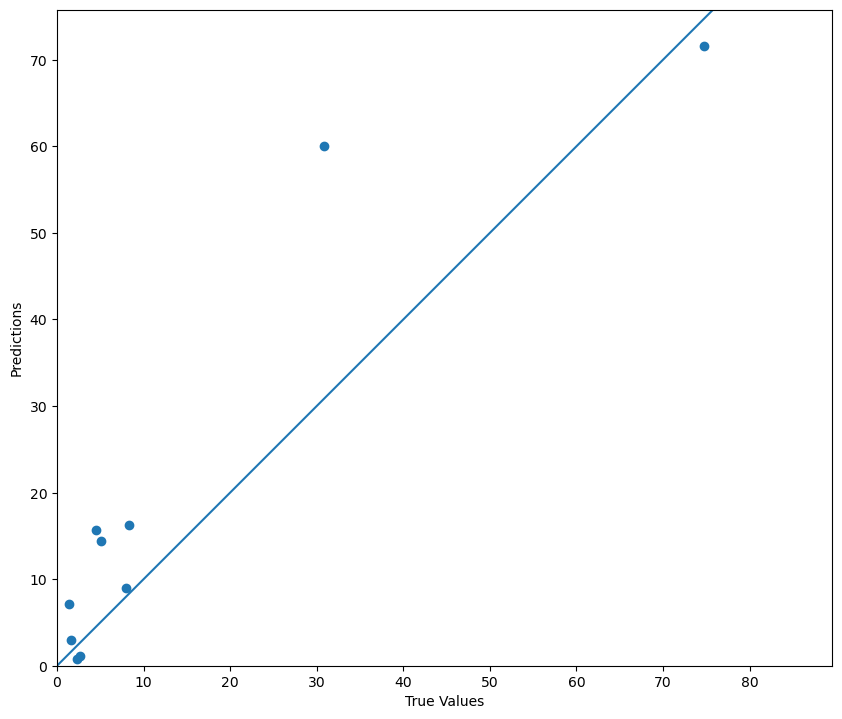

In [8]:
#plot the results in a way that makes sense
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')

#plot the line that is from 0 to the max value of y_pred
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


plt.show()
